In [3]:
!pip install tensorflow_datasets

  Using cached tqdm-4.64.0-py2.py3-none-any.whl (78 kB)
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21503 sha256=b00fa3e6b3ecedd09ee43ce92711abacdc6d2793398e307f1c49ced423054ef9
  Stored in directory: c:\users\lenono\appdata\local\pip\cache\wheels\e1\e8\83\ddea66100678d139b14bc87692ece57c6a2a937956d2532608
Successfully built promise


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

import pandas as pd
import numpy as np

C:\Users\Lenono\anaconda3\envs\dl_lab_rnn\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
data = pd.read_csv('D:\SEM 6\Deep  Learning Lab\RNN\IMDB Dataset.csv\IMDB Dataset.csv')

In [6]:
data.sample(5)

,review,sentiment
42598,"I saw this a couple of nights back, not expect...",negative
46235,"This is a typical ""perfect crime"" thriller. A ...",negative
30367,"This movie is really sick, and funny. I have m...",positive
22395,This movie looked fun on the cover and I hones...,negative
31892,I recommend Idiocracy to everyone. Luke Wilson...,positive


In [7]:
sentence = data['review'].tolist()
labels = data['sentiment'].tolist()
sentence[5],labels[5]

('Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it\'s not preachy or boring. It just never gets old, despite my having seen it some 15 or more times in the last 25 years. Paul Lukas\' performance brings tears to my eyes, and Bette Davis, in one of her very few truly sympathetic roles, is a delight. The kids are, as grandma says, more like "dressed-up midgets" than children, but that only makes them more fun to watch. And the mother\'s slow awakening to what\'s happening in the world and under her own roof is believable and startling. If I had a dozen thumbs, they\'d all be "up" for this movie.',
 'positive')

In [8]:
vocab_size = 1000
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(sentence, vocab_size, max_subword_length=5)

# How big is the vocab size?
print("Vocab size is ", tokenizer.vocab_size)

Vocab size is  1005


In [9]:
print(sentence[5])
encoded = tokenizer.encode(sentence[5])
print(encoded)

Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it's not preachy or boring. It just never gets old, despite my having seen it some 15 or more times in the last 25 years. Paul Lukas' performance brings tears to my eyes, and Bette Davis, in one of her very few truly sympathetic roles, is a delight. The kids are, as grandma says, more like "dressed-up midgets" than children, but that only makes them more fun to watch. And the mother's slow awakening to what's happening in the world and under her own roof is believable and startling. If I had a dozen thumbs, they'd all be "up" for this movie.
[829, 81, 107, 154, 11, 220, 371, 794, 386, 74, 257, 71, 173, 22, 2, 5, 193, 781, 7, 516, 288, 559, 398, 864, 2, 95, 212, 527, 597, 781, 6, 36, 85, 163, 303, 8, 5, 123, 528, 163, 270, 2, 38, 33, 788, 3, 54, 162, 144, 853, 11, 58, 97, 71, 101, 4, 215, 145, 546, 781, 315, 3, 621, 2, 325, 171, 173, 220, 176, 483, 683, 20, 179, 798, 802, 781, 58

In [10]:
for i, sen in enumerate(sentence):
    sentence[i] = tokenizer.encode(sen)

In [11]:
seq_padding = pad_sequences(sentence, 
                            maxlen = 50, 
                            padding='post', 
                            truncating='post')

In [12]:
train_size = int(len(sentence) * 0.8)
train_size

40000

In [13]:
labels = [1 if labels[i] == 'positive' else 0 for i in range(len(labels))]
labels

[1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,


In [14]:
train_seq = seq_padding[0:train_size]
test_seq = seq_padding[train_size:]

train_label = labels[0:train_size]
test_label = labels[train_size:]

train_label = np.array(train_label)
test_label = np.array(test_label)

print("Train : ",len(train_seq),len(test_seq))
print("Test : ",len(train_label),len(test_label))

Train :  40000 10000
Test :  40000 10000


In [15]:
# embedding_dim = 18

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 18, input_length = 50),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [16]:
history = model.fit(train_seq,train_label,epochs=30,validation_data=(test_seq,test_label))
print(history.history['loss'])
print(history.history['accuracy'])

Epoch 1/30
1250/1250 [==============================] - 35s 25ms/step - loss: 0.6233 - accuracy: 0.6431 - val_loss: 0.6116 - val_accuracy: 0.6597
Epoch 2/30
1250/1250 [==============================] - 31s 25ms/step - loss: 0.5806 - accuracy: 0.6865 - val_loss: 0.5786 - val_accuracy: 0.6867
Epoch 3/30
1250/1250 [==============================] - 33s 27ms/step - loss: 0.5585 - accuracy: 0.7011 - val_loss: 0.5671 - val_accuracy: 0.6915
Epoch 4/30
1250/1250 [==============================] - 36s 29ms/step - loss: 0.5419 - accuracy: 0.7139 - val_loss: 0.5664 - val_accuracy: 0.6891
Epoch 5/30
1250/1250 [==============================] - 38s 31ms/step - loss: 0.5300 - accuracy: 0.7230 - val_loss: 0.5685 - val_accuracy: 0.6927
Epoch 6/30
1250/1250 [==============================] - 34s 27ms/step - loss: 0.5164 - accuracy: 0.7318 - val_loss: 0.5651 - val_accuracy: 0.6936
Epoch 7/30
1250/1250 [==============================] - 34s 27ms/step - loss: 0.5062 - accuracy: 0.7391 - val_loss: 0.5655 -

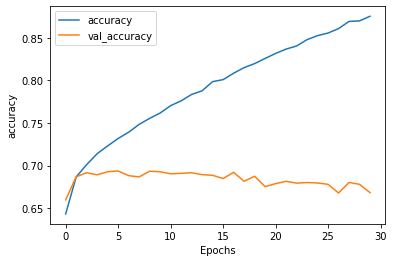

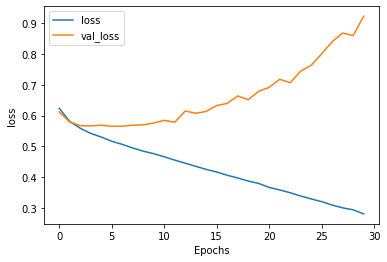

In [17]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")